In [58]:
import pandas as pd
import os
import json
from ast import literal_eval
import matplotlib.pyplot as plt
import pickle
from matplotlib import pyplot
import numpy as np

### For multiple episodes / epochs with different/same trace files

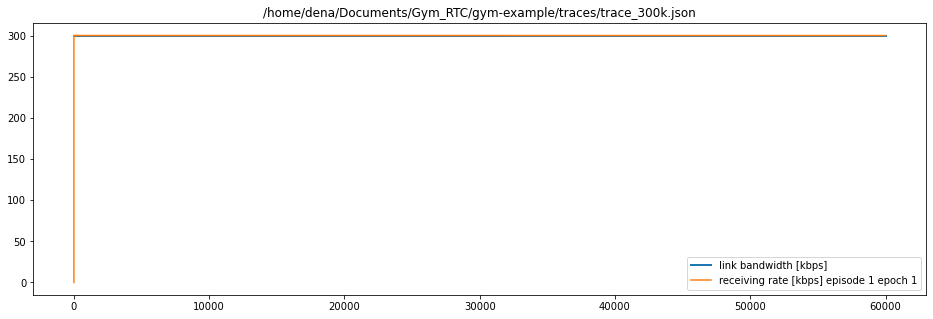

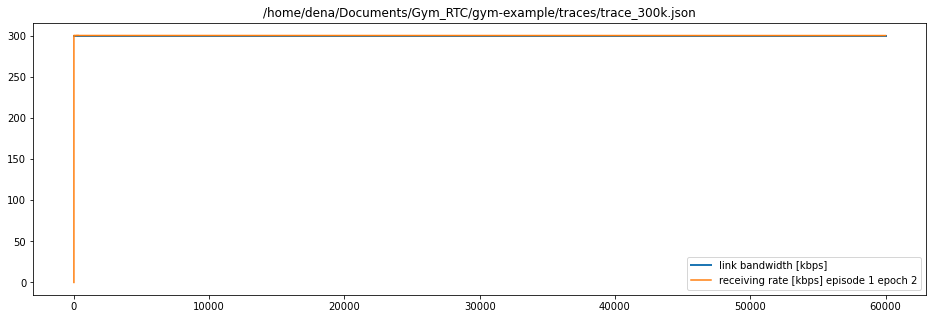

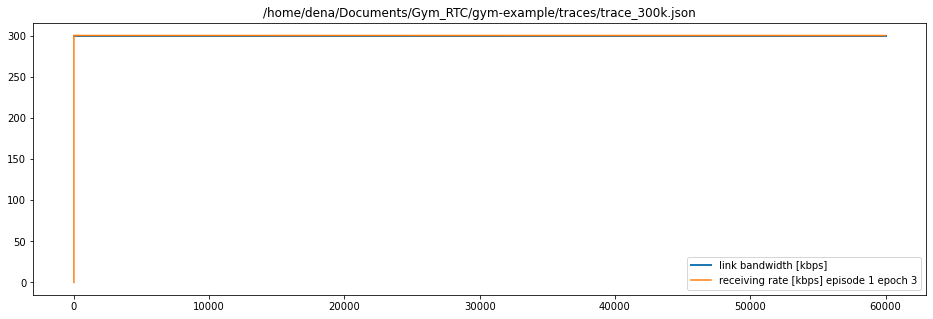

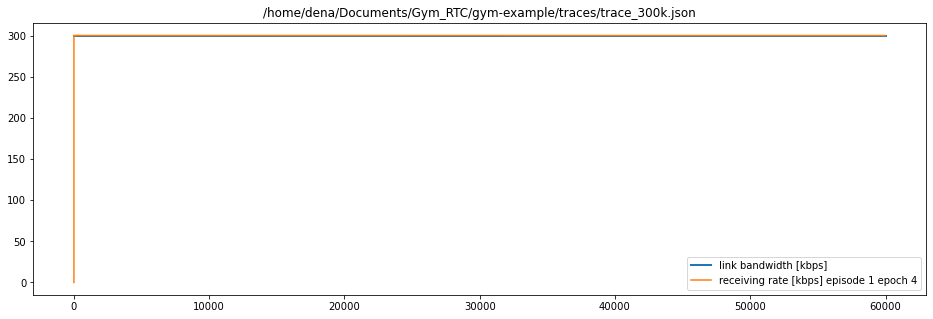

In [61]:
## For multiple episodes / epochs

pickle_path = "/home/dena/Documents/Gym_RTC/gym-example/receiving_rate_per_episode.pickle"
l_rate = pd.read_pickle(pickle_path)
time_step = 100
max_num_episodes = 3

for episode in range(max_num_episodes):
    
    if l_rate[episode]:
        
        for epoch in range(4):
            
            #Define rate
            df_rate = pd.DataFrame(l_rate[episode][epoch]["receiving_rate"], columns=["receiving_rate", "arrival_time_ms"])
            df_rate["receiving_rate"] = df_rate["receiving_rate"]/1000
            t = np.arange(len(df_rate))*time_step
            df_rate["time"] = t
            df_rate.set_index("time", inplace=True)
            
            #Define capacity
            trace_name = l_rate[episode][epoch]["trace"]
            
            with open(trace_name, "r") as f:
                d = json.load(f)
    
            df = pd.DataFrame(d["uplink"]["trace_pattern"])
            time = [0] + list(df["duration"].cumsum())
            capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
            
            plt.figure(figsize=(16,5))
            plt.title(trace_name)
            plt.step(time, capacities, lw=2, label="link bandwidth [kbps]")
            plt.step(df_rate.index, df_rate["receiving_rate"], \
                     label=f"receiving rate [kbps] episode {episode+1} epoch {epoch+1}")
            plt.legend()
#             plt.ylim(0,5000)
#             plt.xlim(0,60000)
            
            
        

### Debugging

In [32]:
df_rate = pd.DataFrame(l_rate[2][0]["receiving_rate"], columns=["receiving_rate", "arrival_time_ms"])
df_rate["receiving_rate"] = df_rate["receiving_rate"]/1000
t = np.arange(len(df_rate))*60
df_rate["time"] = t
df_rate.set_index("time", inplace=True)
df_rate

,receiving_rate,arrival_time_ms
time,,
0,0.000000,NaN
60,0.000000,NaN
120,0.000000,NaN
180,46.533333,206.0
240,137.866667,272.0
...,...,...
60600,236.266667,60639.0
60660,225.600000,60707.0
60720,187.866667,60740.0
